In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import pair_confusion_matrix
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [24]:
data = pd.read_csv('train.csv')
X = data.iloc[:, :-1] 

In [25]:
def optimal_k(X):
    distortions = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    # Plot Elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method to find optimal k')
    plt.show()

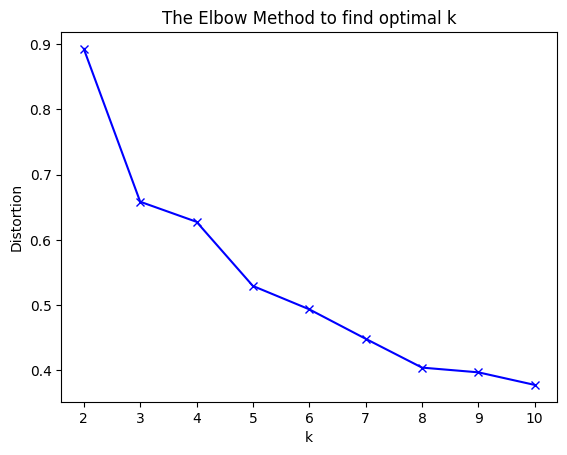

In [26]:
optimal_k(X)

In [27]:
optimal_k_value = 3  # Based on elbow graph 
kmeans = KMeans(n_clusters=optimal_k_value, random_state=42)
kmeans.fit(X)
predicted_labels = kmeans.labels_
# print(predicted_labels.dtype)
# print(type(predicted_labels))
# print(predicted_labels.shape)

In [28]:
sil_score = silhouette_score(X, labels)
print(sil_score)

0.5492262639972559


In [29]:
def bcubed_precision(true_labels, predicted_labels):
    n = len(true_labels)
    precision = 0.0
    for i in range(n):
        match_pred = (predicted_labels == predicted_labels[i])
        match_true = (true_labels == true_labels[i])
        precision += np.sum(match_pred & match_true) / np.sum(match_pred)
    return precision / n

In [30]:
def bcubed_recall(true_labels, predicted_labels):
    n = len(true_labels)
    recall = 0.0
    for i in range(n):
        match_pred = (predicted_labels == predicted_labels[i])
        match_true = (true_labels == true_labels[i])
        recall += np.sum(match_pred & match_true) / np.sum(match_true)
    return recall / n

In [31]:
true_labels = data.iloc[:, -1]  # Ground truth labels
# print(true_labels)
# print(true_labels.dtype)
# print(type(true_labels))
# print(true_labels.shape)

# Map predicted clusters to labels
b_cubed_precision = bcubed_precision(true_labels, predicted_labels)
b_cubed_recall = bcubed_recall(true_labels, predicted_labels)

print(f"Silhouette Score: {sil_score}")
print(f"BCubed Precision: {b_cubed_precision}")
print(f"BCubed Recall: {b_cubed_recall}")

Silhouette Score: 0.5492262639972559
BCubed Precision: 0.7815873015873013
BCubed Recall: 0.7952380952380955
